In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [7]:
# Unpickle the results for vgg16 and alexnet
RESULTS_DIR = os.path.join(os.getcwd(), 'results')
with open(os.path.join(RESULTS_DIR, 'training_results_alexnet.pkl'), 'rb') as f:
    alexnet_results = pickle.load(f)

with open(os.path.join(RESULTS_DIR, 'training_results_vgg16.pkl'), 'rb') as f:
    vgg16_results = pickle.load(f)

In [18]:
alexnet_train_loss = alexnet_results['loss']
alexnet_train_acc = alexnet_results['accuracy']
alexnet_epoch_time = alexnet_results['epoch_time']

vgg_train_loss = vgg16_results['loss']
vgg_train_acc = vgg16_results['accuracy']
vgg_epoch_time = vgg16_results['epoch_time']


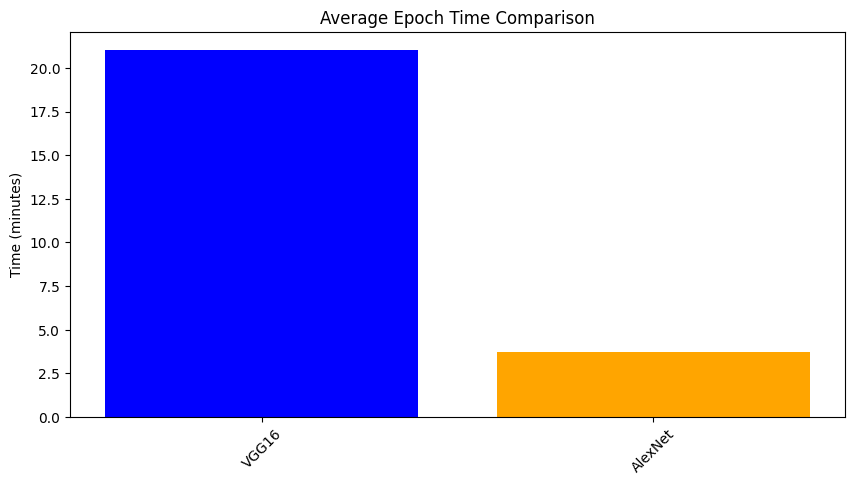

In [19]:
vgg_epoch_time = np.array(vgg_epoch_time) / 60  # Convert to minutes
alexnet_epoch_time = np.array(alexnet_epoch_time) / 60  # Convert to minutes
# take the mean of the epoch time for each model
vgg_epoch_time_mean = np.mean(vgg_epoch_time)
alexnet_epoch_time_mean = np.mean(alexnet_epoch_time)

#Plot a comparison of epoch time for both models
plt.figure(figsize=(10, 5))
plt.bar(['VGG16', 'AlexNet'], [vgg_epoch_time_mean, alexnet_epoch_time_mean], color=['blue', 'orange'])
plt.title('Average Epoch Time Comparison')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(RESULTS_DIR, 'epoch_time_comparison.png'), bbox_inches='tight')


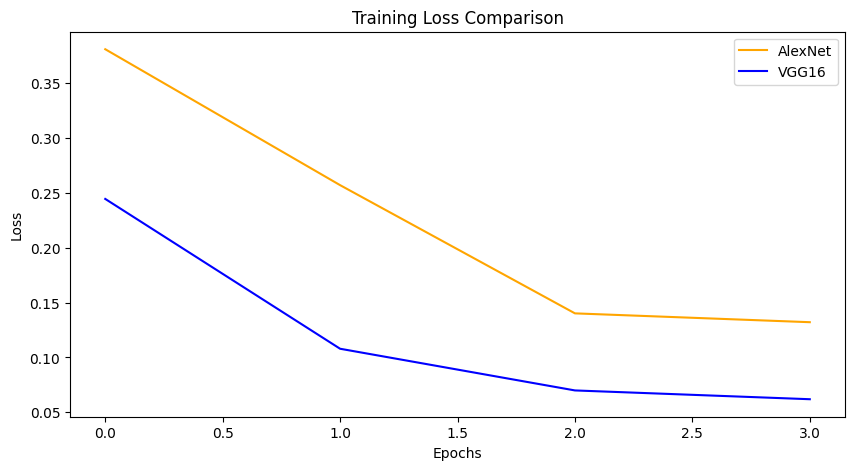

In [16]:
#Plot a comparison of training loss for both models
plt.figure(figsize=(10, 5))
plt.plot(alexnet_train_loss, label='AlexNet', color='orange')
plt.plot(vgg_train_loss, label='VGG16', color='blue')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(RESULTS_DIR, 'training_loss_comparison.png'), bbox_inches='tight')


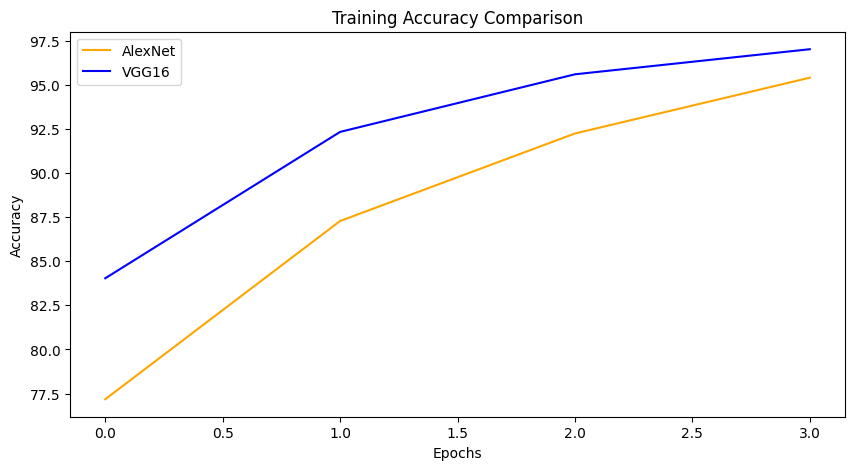

In [17]:
# Plot a comparison of training accuracy for both models
plt.figure(figsize=(10, 5))
plt.plot(alexnet_train_acc, label='AlexNet', color='orange')
plt.plot(vgg_train_acc, label='VGG16', color='blue')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(RESULTS_DIR, 'training_accuracy_comparison.png'), bbox_inches='tight')
